# ¡Hola Ricardo! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Hola Ricardo, ¿cómo estás? Espero que todo esté bien por tu lado.
    
Felicitaciones por completar todos los items del notebook, veo bastante trabajo a lo largo de este. En general, está todo correcto y con una buena aplicación del código necesario para lograr los objetivos. Tan solo resta que realices algunas pequeñas correcciones para el cálculo del consumo y revises cómo esto cambia el análisis de la segunda mitad, especialmente para la parte de ingreso y los tests de hipótesis. Te dejé comentarios en rojo en todas las correcciones de esta primera revisión, revísalos y realiza las modificaciones necesarias.

Si tienes dudas o preguntas, me las puedes dejar en comentario azul, con gusto las responderé en la siguiente iteración.

Saludos!


</div>

## Resumen de la revisión v2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2 </b> <a class="tocSkip"></a>

Excelente Ricardo, ¡muy bien hecho! Incorporaste correctamente los ajustes finales y terminaste todas las tareas del notebook. No tengo comentarios adicionales; el proyecto está aprobado. Los conceptos que usaste serán una gran base para tus próximos análisis. ¡Te deseo lo mejor en lo que sigue!

Saludos!


</div>

----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


Bien. Después de leer las instrucciones del proyecto, como se redacta en cada paso e instrucción, lo primero que debemos hacer es revisar cada archivo, detectar como tienen estructurada la información y estudiar los datos que contiene cada archivo. Después, tendrémos que preparar la información dándole orden, modificar los tipos de datos que tengamos que modificar, encontrar y eliminar los errores que encontremos y que no nos sirvan. Posteriormente teniendo la información preparada y ordenada, podremos trabajar con ella para procesarla y aplicar las funciones que vayamos a usar para analizar los datos del comportamiento de los clientes identificando cada punto que describen las instrucciones del proyecto. Después del procesamiento, podremos formular las hipótesis que queramos atendiendo cada punto descrito en las instrucciones y finalizaremos redactando nuestra conclusión en general.

Todo este desarrollo descrito, tendrá el propóstio general de conocer cuál de las 2 tarifas que actualmente tiene la empresa genera mayores ingresos que puedan ser destinados para actualizar y ajustar el presupuesto de la publicidad de la empresa.


## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
plt.style.use('default')



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

# Vamos a darle una vista rápida a los datos en cada dataset para ver cuantas filas y columnas tenemos en cada uno
print('users', users.shape)
print('calls', calls.shape)
print('messages', messages.shape)
print('internet', internet.shape)
print('plans', plans.shape)


users (500, 8)
calls (137735, 4)
messages (76051, 3)
internet (104825, 4)
plans (2, 8)


## Preparar los datos

Vamos a explorar cada tabla para conocer el contenido de cada una y detectar si hay nulos, duplicados y el tipo de datos que tiene configurada cada columna para valorar si debermos hacer cambios.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Después de revisar la información general y los datos obtenidos en la muestra impresa, vemos que los datos al parecer están correctamente estructurados. Sin embargo, pienso que deberíamos re ordenarlos, pasando la columna de plan_name al principio de todas las columnas y posteriormente poner todas las columnas restantes.

## Corregir datos

A continuación, usaremos la función reindex para obtener un nuevo orden en las columnas. Pasarémos plan_name al principio ya que contiene información que es conveniente tener al principio del DataSet.

In [5]:
# Asignamos un nuevo orden a las columnas para una fácil comprensión y análisis
nuevo_orden = ['plan_name', 'messages_included', 'mb_per_month_included', 
               'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 
               'usd_per_message', 'usd_per_minute']
plans = plans.reindex(columns=nuevo_orden)
plans.head()

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


## Enriquecer los datos

Pienso que así como tenemos ordenado nuestro DataSet, está bien para realizar los procesamientos y análisis que tenemos que hacer

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Bien, correcto. Se podría haber modificado el consumo de internet incluido, de mb a gb, pero no es obligatorio.



</div>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


 Después de revisar la información general y los datos obtenidos en la muestra impresa, se logra visualizar que la estructura que tiene la información es buena, sin embargo, quizás valdría la pena modificar los tipos de datos que tiene configurada la clomuna de reg_date y churn_date para poder realizar el procesamiento lo más ágil posible. 

### Corregir los datos

Usaremos la función datetime64[ns] usando pd.to_datetime() para convertir el tipo de datos de las columnas que tienen valores de fechas.

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date']) # Usamos to_datetime para cambiar el tipo de dato a fecha
users['churn_date'] = pd.to_datetime(users['churn_date']) # Usamos to_datetime para cambiar el tipo de dato a fecha
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

Aquí unicamente nos aseguramos de que solo existan valores nulos en la columna churn_date y también nos aseguramos de que los valores de user_id sean únicos y no haya repetidos.

In [9]:
# Usamos .isna().sum() para verificar cuántos valores nulos existen en las columnas 
print('users nulos:\n', users.isna().sum()) 

# Revisaremos si existen usuarios duplicados con .nunique()
users['user_id'].nunique()


users nulos:
 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


500

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Muy bien, correcta esta parte de los usuarios.





</div>

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Después de revisar la información general y los datos obtenidos en la muestra impresa, se logra visualizar que la estructura que tiene la información es buena, sin embargo, quizás valdría la pena modificar los tipos de datos que tiene configurada la clomuna de call_date para poder realizar el procesamiento lo más ágil posible.

### Corregir los datos

Usaremos la función datetime64[ns] usando pd.to_datetime() para convertir el tipo de datos de las columnas que tienen valores de fechas.

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien con la conversión a tipo fecha, permite la obtención del mes, lo cual será necesario para más adelante.

</div>

### Enriquecer los datos

A continuación, creamos una columna que convine año y mes con year_month para que posteriormente agrupemos las columnas user_id con year_month para contar las llamadas por id y sumar los minutos por duration. Después renombraremos las columnas en el DataFrame y regresamos la informacón para comprobar la actualización del DataFrame.

In [13]:
# Redondear hacia arriba la duración de cada llamada individual
calls['duration'] = np.ceil(calls['duration'])

# Crearemos una columna que convine año-mes
calls['year_month'] = calls['call_date'].dt.to_period('M')

# Agrupamos por user_id y year_month: contamos llamadas Y sumamos minutos
calls_monthly = calls.groupby(['user_id', 'year_month']).agg({
    'id': 'count',        # Contar llamadas
    'duration': 'sum'     # Sumar minutos
}).reset_index()

# Renombramos columnas para tener claridad
calls_monthly.columns = ['user_id', 'month', 'calls_count', 'total_minutes']

# Imprimimos las primeras filas para verificar
print("Llamadas por usuario por mes:")
print(calls_monthly.head())
print(f"\nTotal de registros: {len(calls_monthly)}") # len() cumple con la función de calcular la longitud del string, es decir, el número de filas

Llamadas por usuario por mes:
   user_id    month  calls_count  total_minutes
0     1000  2018-12           16          124.0
1     1001  2018-08           27          182.0
2     1001  2018-09           49          315.0
3     1001  2018-10           65          393.0
4     1001  2018-11           64          426.0

Total de registros: 2258


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>


Bien con la obtención del mes de cada llamada. Sin emabrgo, en esta parte no se requiere agrupar las llamadas de forma mensual y además, la duración de llamadas debe aproximarse hacia arriba antes de agruparse.


</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   v2       </b> <a class="tocSkip"></a>

Muy bien, correcto!



</div>

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


De igual forma, revisando la información general y los datos obtenidos en la muestra impresa, se logra visualizar que la estructura que tiene la información es buena, sin embargo, valdrá la pena modificar los tipos de datos que tiene configurada la clomuna de message_date para poder realizar el procesamiento lo más ágil posible.

### Corregir los datos

Usaremos la función datetime64[ns] usando pd.to_datetime() para convertir el tipo de datos de las columnas que tienen valores de fechas.

In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

De igual manera, creamos una columna que convine año y mes con year_month para que posteriormente agrupemos las columnas user_id con year_month para contar la cantidad de mensajes mensuales por id. Después renombraremos las columnas en el DataFrame y regresamos la informacón para comprobar la actualización del DataFrame.

In [17]:
# Crearemos una columna que convine año-mes
messages['year_month'] = messages['message_date'].dt.to_period('M') # .dt.to_period('M') convierte fechas a periodos mensuales

# Agrupamos por user_id y year_month: contamos mensajes
messages_monthly = messages.groupby(['user_id', 'year_month']).agg({
    'id': 'count'        # Contar mensajes
}).reset_index()

# Renombramos columnas para tener claridad
messages_monthly.columns = ['user_id', 'month', 'messages_count']

# Imprimimos las primeras filas para verificar
print("Mensajes por usuario por mes:")
print(messages_monthly.head())
print(f"\nTotal de registros: {len(messages_monthly)}") # len() cumple con la función de calcular la longitud del string, es decir, el número de filas

Mensajes por usuario por mes:
   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36

Total de registros: 1806


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Muy bien con las modificaciones, bien al hacer la conversión a tipo fecha.



</div>

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Después de revisar la información general y los datos obtenidos en la muestra impresa, se logra visualizar que la estructura que tiene la información es buena, sin embargo, quizás valdría la pena modificar los tipos de datos que tiene configurada la clomuna de session_date para poder realizar el procesamiento lo más ágil posible.

### Corregir los datos

Usaremos la función datetime64[ns] usando pd.to_datetime() para convertir el tipo de datos de las columnas que tienen valores de fechas.

In [20]:
# Como dato informativo, session_date hace referencia a el día en el que el usuario se conectó a internet y uso datos
# Aquí convertimos a pd.to_datetime la columna session_date para tenerla con formato útil para el procesamiento
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Vamos a realizar algo similar a lo que hicimos en los DF de llamadas y mensajes. Creamos una columna que convine año y mes con year_month para que posteriormente agrupemos las columnas user_id con year_month para obtener la cantidad de datos mensuales por id. Después renombraremos las columnas en el DataFrame y regresamos la informacón para comprobar la actualización del DataFrame.

In [21]:
# Crearemos una columna que convine año-mes
internet['year_month'] = internet['session_date'].dt.to_period('M') # .dt.to_period('M') convierte fechas a periodos mensuales

# Agrupamos por user_id y year_month: sacamos el total de datos usados
internet_monthly = internet.groupby(['user_id', 'year_month']).agg({
    'mb_used': 'sum'        # Sacamos el total de datos
}).reset_index()

# Renombramos columnas para tener claridad
internet_monthly.columns = ['user_id', 'month', 'mb_used']

# Imprimimos las primeras filas para verificar
print("Datos usados por usuario por mes:")
print(internet_monthly.head())
print(f"\nTotal de registros: {len(internet_monthly)}") # len() cumple con la función de calcular la longitud del string, es decir, el número de filas

Datos usados por usuario por mes:
   user_id    month   mb_used
0     1000  2018-12   1901.47
1     1001  2018-08   6919.15
2     1001  2018-09  13314.82
3     1001  2018-10  22330.49
4     1001  2018-11  18504.30

Total de registros: 2277


<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>


Bien con la obtención del mes, pero la agrupación y suma no era necesaria en esta parte.


</div>

## Estudiar las condiciones de las tarifas

Aquí volvemos a imprimir el DataFrame de Plans, para tenerlo en el radar.

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)

  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                  15360               500   
1  ultimate               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
0               20          10             0.03            0.03  
1               70           7             0.01            0.01  


## Agregar datos por usuario


Comenzaremos a organizar de manera ordenada por user_id y month los datos que nos serán útiles para avanzar poco a poco en el análisis. Comenzaremos por llamadas, después minutos, después mensajes, posteriormente volúmen de tráfico de internet.

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
print("Número de llamadas por usuario por mes:")
print(calls_monthly[['user_id', 'month', 'calls_count']].head())

Número de llamadas por usuario por mes:
   user_id    month  calls_count
0     1000  2018-12           16
1     1001  2018-08           27
2     1001  2018-09           49
3     1001  2018-10           65
4     1001  2018-11           64


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
print("Total de minutos usados por usuario por mes:")
print(calls_monthly[['user_id', 'month', 'total_minutes']].head())

Total de minutos usados por usuario por mes:
   user_id    month  total_minutes
0     1000  2018-12          124.0
1     1001  2018-08          182.0
2     1001  2018-09          315.0
3     1001  2018-10          393.0
4     1001  2018-11          426.0


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Antes de agrupar las llamadas por mes y usuario, debes redondear hacia arriba la duración de cada una de las llamadas. Puedes utilizar `np.ceil` o alguna función similar sobre la columna `duration`. Esto es importante realizarlo antes del `groupby`, ya que si no, los datos agrupados no servirán para el cálculo de ingreso por usuario.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor    v2      </b> <a class="tocSkip"></a>


Bien hecho, ahora se tiene la duración a facturar correcta


</div>

In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
print("Total de mensajes enviados por cada usuario al mes:")
print(messages_monthly[['user_id', 'month', 'messages_count']].head())

Total de mensajes enviados por cada usuario al mes:
   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
print("Total de datos usados por usuario por mes:")
print(internet_monthly[['user_id', 'month', 'mb_used']].head())

Total de datos usados por usuario por mes:
   user_id    month   mb_used
0     1000  2018-12   1901.47
1     1001  2018-08   6919.15
2     1001  2018-09  13314.82
3     1001  2018-10  22330.49
4     1001  2018-11  18504.30


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien, correcto el cálculo de consumo de mensajes e internet. Luego, el internet se debe convertir a gb y aproximarse hacia arriba.

</div>

Juntamos los nuevos registros obtenidos con .merge() para que tengamos un nuevo DataFrame que represente de manera más óptima la información obtenida. Además, agregaremos a este nuevo DataFrame, la información de la tabla inicial para que tengamos todo unificado en un solo DataFrame.

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Fusionar llamadas y mensajes
user_data = calls_monthly.merge(messages_monthly, 
                               on=['user_id', 'month'], 
                               how='outer')

# Añadir datos de internet
user_data = user_data.merge(internet_monthly, 
                           on=['user_id', 'month'], 
                           how='outer')
print(user_data.head())

   user_id    month  calls_count  total_minutes  messages_count   mb_used
0     1000  2018-12         16.0          124.0            11.0   1901.47
1     1001  2018-08         27.0          182.0            30.0   6919.15
2     1001  2018-09         49.0          315.0            44.0  13314.82
3     1001  2018-10         65.0          393.0            53.0  22330.49
4     1001  2018-11         64.0          426.0            36.0  18504.30


<div class="alert alert-block alert-success">
<b>Comentario de Revisor     </b> <a class="tocSkip"></a>

Correcto el uso del merge tipo outer, esto evita que se pierdan datos de usuarios.

</div>

In [28]:
# Añade la información de la tarifa
user_data = user_data.merge(users[['user_id', 'plan']], 
                           on='user_id', 
                           how='left')

user_data = user_data.merge(plans, 
                           left_on='plan', 
                           right_on='plan_name', 
                           how='left')

print(user_data.head())


   user_id    month  calls_count  total_minutes  messages_count   mb_used  \
0     1000  2018-12         16.0          124.0            11.0   1901.47   
1     1001  2018-08         27.0          182.0            30.0   6919.15   
2     1001  2018-09         49.0          315.0            44.0  13314.82   
3     1001  2018-10         65.0          393.0            53.0  22330.49   
4     1001  2018-11         64.0          426.0            36.0  18504.30   

       plan plan_name  messages_included  mb_per_month_included  \
0  ultimate  ultimate               1000                  30720   
1      surf      surf                 50                  15360   
2      surf      surf                 50                  15360   
3      surf      surf                 50                  15360   
4      surf      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7             0.01

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien, en esta parte basta con el uso de left ya que la data de consumo de usuarios ya está completa.

</div>

Perfecto!. Primero procederemos a realizar el cálculo de los excesos de minutos, mensajes y datos por usuario generados mensualmente. Para ello usamos la función lambda con el método apply() para obetener el dato de los excesos de cada rubro.
Posteriormente realizamos el calculo por excesos de cada usuario multiplicando el costo que tiene cada rubro de manera individual por el moento acumulado de cada rubro. 
Al finalizar, se añade la cuota mensual generada por cada usuario en una nueva columna. 
Por último, verificamos que el DataFrame, no tenga valores nulos usando .isnull().sum().

In [29]:
# Calcula el ingreso mensual para cada usuario
# Calcular exceso de minutos (si es negativo, no hay exceso)
user_data['excess_minutes'] = user_data['total_minutes'] - user_data['minutes_included']
user_data['excess_minutes'] = user_data['excess_minutes'].apply(lambda x: max(0, x))

# Exceso de mensajes
user_data['excess_messages'] = user_data['messages_count'] - user_data['messages_included']
user_data['excess_messages'] = user_data['excess_messages'].apply(lambda x: max(0, x))

# Exceso de datos (convertir MB a GB)
user_data['excess_gb'] = (user_data['mb_used'] - user_data['mb_per_month_included']) / 1024
user_data['excess_gb'] = user_data['excess_gb'].apply(lambda x: max(0, x))

# Redondear hacia arriba el exceso de GB
user_data['excess_gb'] = np.ceil(user_data['excess_gb'])

# Redondear hacia arriba el exceso de GB (se cobra por GB completos)
user_data['excess_gb'] = np.ceil(user_data['excess_gb'])

# Calculamos cargos por excesos
user_data['excess_minutes_cost'] = user_data['excess_minutes'] * user_data['usd_per_minute']
user_data['excess_messages_cost'] = user_data['excess_messages'] * user_data['usd_per_message']
user_data['excess_gb_cost'] = user_data['excess_gb'] * user_data['usd_per_gb']

# Calculamos el ingreso mensual total
user_data['monthly_revenue'] = (user_data['usd_monthly_pay'] + 
                               user_data['excess_minutes_cost'] + 
                               user_data['excess_messages_cost'] + 
                               user_data['excess_gb_cost'])

print("Ingresos totales al mes por usuario:")
print(user_data.head())

print("Ingresos mensuales calculados:")
print(user_data[['user_id', 'month', 'plan', 'monthly_revenue']].head())

print("Valores nulos por columna:")
print(user_data.isnull().sum())

Ingresos totales al mes por usuario:
   user_id    month  calls_count  total_minutes  messages_count   mb_used  \
0     1000  2018-12         16.0          124.0            11.0   1901.47   
1     1001  2018-08         27.0          182.0            30.0   6919.15   
2     1001  2018-09         49.0          315.0            44.0  13314.82   
3     1001  2018-10         65.0          393.0            53.0  22330.49   
4     1001  2018-11         64.0          426.0            36.0  18504.30   

       plan plan_name  messages_included  mb_per_month_included  ...  \
0  ultimate  ultimate               1000                  30720  ...   
1      surf      surf                 50                  15360  ...   
2      surf      surf                 50                  15360  ...   
3      surf      surf                 50                  15360  ...   
4      surf      surf                 50                  15360  ...   

   usd_per_gb  usd_per_message  usd_per_minute  excess_minutes  \
0

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

La idea del cálculo del revenue mensual va bien, pero requiere que para las llamadas la duración a facturar esté correcta (lo que señalé anteriormente, que se debe aproximar hacia arriba antes de agrupar por usuario y mes) y además, en esta parte, luego de haber agrupado y convertido a gb se requiere aproximar hacia arriba el consumo de internet.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor      v2      </b> <a class="tocSkip"></a>


Muy buen trabajo! El cálculo del revenue mensual por usuario está correcto

</div>

## Estudia el comportamiento de usuario

Primero, sacaremos estadísticas descriptivas generales de llamadas, mensajes e internet para obtener como resultado la media, mediana, varianza y desviación estándar genarales de cada rubro.
Posterior a eso, trazaremos histogramas para reflejar visualmente los resultados obtenidos y los aplicaremos a un diagrama de caja para visualizar los resultados obtenidos.

### Llamadas

Duración promedio de llamadas por plan y mes:
   plan    month  total_minutes
0  surf  2018-01     203.000000
1  surf  2018-02     297.000000
2  surf  2018-03     330.000000
3  surf  2018-04     351.540000
4  surf  2018-05     410.240000
5  surf  2018-06     435.791667
6  surf  2018-07     453.733333
7  surf  2018-08     417.849057
8  surf  2018-09     420.732984
9  surf  2018-10     438.991379


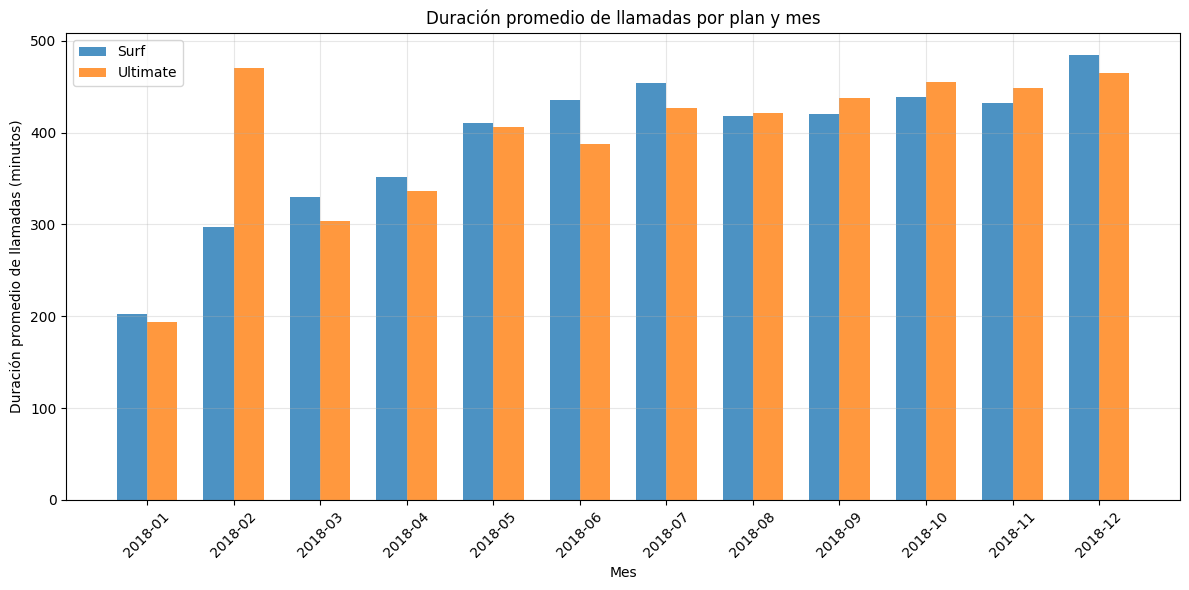

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Calcular duración promedio de llamadas por plan y mes
# Filtramos solo los registros que tienen datos de llamadas (no nulos)
calls_data = user_data[user_data['total_minutes'].notna()].copy()

# Calculamos la duración promedio por plan y mes
avg_duration_by_plan_month = calls_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()
print("Duración promedio de llamadas por plan y mes:")
print(avg_duration_by_plan_month.head(10))

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))

# Separar datos por plan para el gráfico
surf_data = avg_duration_by_plan_month[avg_duration_by_plan_month['plan'] == 'surf']
ultimate_data = avg_duration_by_plan_month[avg_duration_by_plan_month['plan'] == 'ultimate']

# Configurar posiciones de las barras
months = surf_data['month'].astype(str)  # Convertir a string para el eje x
x = range(len(months))
width = 0.35

# Creamos las barras
plt.bar([i - width/2 for i in x], surf_data['total_minutes'], width, label='Surf', alpha=0.8)
plt.bar([i + width/2 for i in x], ultimate_data['total_minutes'], width, label='Ultimate', alpha=0.8)

# Personalizamos el gráfico
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.title('Duración promedio de llamadas por plan y mes')
plt.xticks(x, months, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor      </b> <a class="tocSkip"></a>

Muy bien, correcto el gráfico. Vemos que en en general el consumo promedio mensual es similar entre ambos planes.
</div>

Estadísticas de minutos mensuales por plan:
Plan Surf - Usuarios: 1545
Plan Ultimate - Usuarios: 713


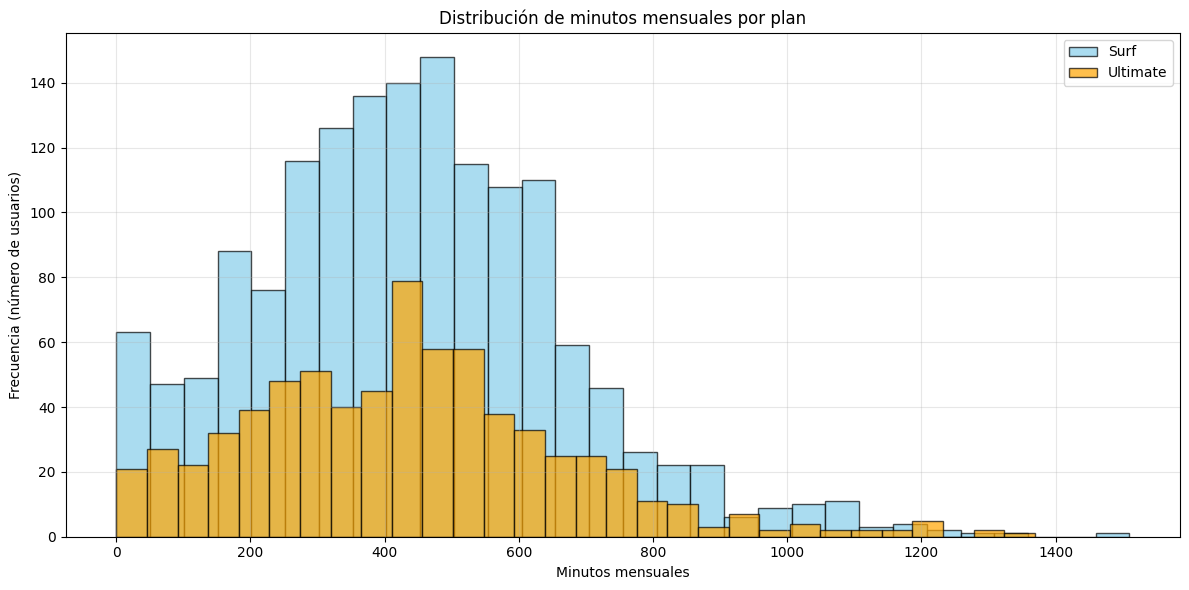


=== ESTADÍSTICAS DESCRIPTIVAS ===
Plan Surf:
  Media: 436.52 minutos
  Mediana: 430.00 minutos
  Desviación estándar: 229.28 minutos

Plan Ultimate:
  Media: 434.68 minutos
  Mediana: 425.00 minutos
  Desviación estándar: 237.85 minutos


In [31]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Filtramos solo registros con datos de llamadas (no nulos)
minutes_data = user_data[user_data['total_minutes'].notna()].copy()

# Separar datos por plan
surf_minutes = minutes_data[minutes_data['plan'] == 'surf']['total_minutes']
ultimate_minutes = minutes_data[minutes_data['plan'] == 'ultimate']['total_minutes']

print("Estadísticas de minutos mensuales por plan:")
print(f"Plan Surf - Usuarios: {len(surf_minutes)}")
print(f"Plan Ultimate - Usuarios: {len(ultimate_minutes)}")

# Crear histograma comparativo
plt.figure(figsize=(12, 6))

# Crear histogramas superpuestos
plt.hist(surf_minutes, bins=30, alpha=0.7, label='Surf', color='skyblue', edgecolor='black')
plt.hist(ultimate_minutes, bins=30, alpha=0.7, label='Ultimate', color='orange', edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Minutos mensuales')
plt.ylabel('Frecuencia (número de usuarios)')
plt.title('Distribución de minutos mensuales por plan')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print("Plan Surf:")
print(f"  Media: {surf_minutes.mean():.2f} minutos")
print(f"  Mediana: {surf_minutes.median():.2f} minutos")
print(f"  Desviación estándar: {surf_minutes.std():.2f} minutos")

print("\nPlan Ultimate:")
print(f"  Media: {ultimate_minutes.mean():.2f} minutos")
print(f"  Mediana: {ultimate_minutes.median():.2f} minutos")
print(f"  Desviación estándar: {ultimate_minutes.std():.2f} minutos")

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien, correcto, las distribuciones son más o menos similares, pero surf parece más concentrado
</div>

A continuación, calcularemos la media, la variable de duración de las llamadas para identificar si los usuarios se comportan de manera diferente.

In [32]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Filtramos solo registros con datos de llamadas (no nulos)
calls_data = user_data[user_data['total_minutes'].notna()].copy()

print("Datos de llamadas preparados:")
print(f"Total de registros con llamadas: {len(calls_data)}")
print(f"Columnas disponibles: {calls_data.columns.tolist()}")

# Calculamos media y varianza para todos los usuarios
media_general = calls_data['total_minutes'].mean()
varianza_general = calls_data['total_minutes'].var()

print("\n=== ESTADÍSTICAS GENERALES DE DURACIÓN DE LLAMADAS ===")
print(f"Media: {media_general:.2f} minutos")
print(f"Varianza: {varianza_general:.2f}")
print(f"Desviación estándar: {calls_data['total_minutes'].std():.2f} minutos")

# Calculamos media y varianza por plan
print("\n=== ESTADÍSTICAS POR PLAN ===")

# Plan Surf
surf_calls = calls_data[calls_data['plan'] == 'surf']['total_minutes']
media_surf = surf_calls.mean()
varianza_surf = surf_calls.var()

print(f"\nPlan SURF:")
print(f"  Media: {media_surf:.2f} minutos")
print(f"  Varianza: {varianza_surf:.2f}")
print(f"  Desviación estándar: {surf_calls.std():.2f} minutos")

# Plan Ultimate
ultimate_calls = calls_data[calls_data['plan'] == 'ultimate']['total_minutes']
media_ultimate = ultimate_calls.mean()
varianza_ultimate = ultimate_calls.var()

print(f"\nPlan ULTIMATE:")
print(f"  Media: {media_ultimate:.2f} minutos")
print(f"  Varianza: {varianza_ultimate:.2f}")
print(f"  Desviación estándar: {ultimate_calls.std():.2f} minutos")

Datos de llamadas preparados:
Total de registros con llamadas: 2258
Columnas disponibles: ['user_id', 'month', 'calls_count', 'total_minutes', 'messages_count', 'mb_used', 'plan', 'plan_name', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'excess_minutes', 'excess_messages', 'excess_gb', 'excess_minutes_cost', 'excess_messages_cost', 'excess_gb_cost', 'monthly_revenue']

=== ESTADÍSTICAS GENERALES DE DURACIÓN DE LLAMADAS ===
Media: 435.94 minutos
Varianza: 53811.17
Desviación estándar: 231.97 minutos

=== ESTADÍSTICAS POR PLAN ===

Plan SURF:
  Media: 436.52 minutos
  Varianza: 52571.06
  Desviación estándar: 229.28 minutos

Plan ULTIMATE:
  Media: 434.68 minutos
  Varianza: 56573.63
  Desviación estándar: 237.85 minutos


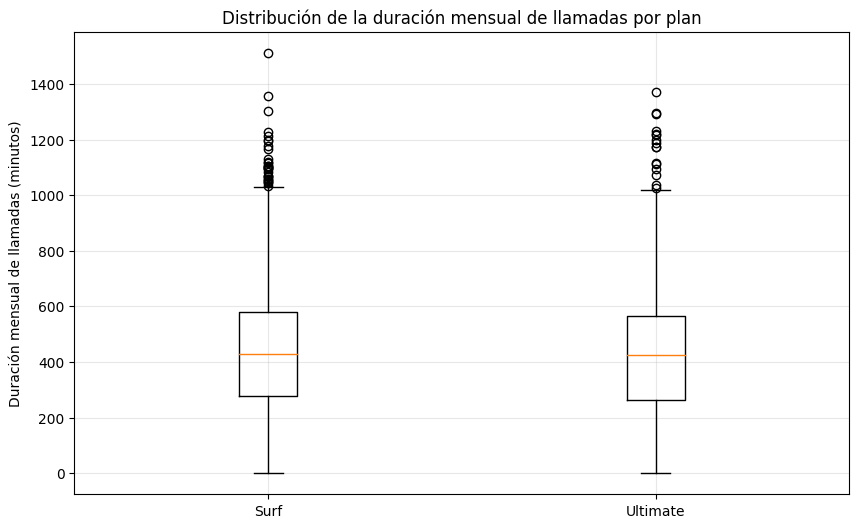

In [33]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))

# Preparamos los datos para el boxplot
data_for_boxplot = [surf_calls, ultimate_calls]
labels = ['Surf', 'Ultimate']

# Creamos el diagrama de caja
plt.boxplot(data_for_boxplot, labels=labels)

# Personalizamos el gráfico
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.grid(True, alpha=0.3)
plt.show()


Definitivamente los usuarios que se encuentran en el esquema Surf, tienen a realizar mayor número de llamadas vs los usuarios que se encuentran en el esquema ultimate.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor      </b> <a class="tocSkip"></a>

Excelente trabajo con los análisis de distribución y del cálculo de media y varianza. Estos nos indican que ambos planes son similares en consumo de llamadas si los vemos en un total de la data, aunque a lo largo de los meses han tenido diferencias que disminuyeron en los meses recientes.

</div>

### Mensajes

Datos de mensajes preparados:
Total de registros con mensajes: 1806
Registros por plan:
surf        1222
ultimate     584
Name: plan, dtype: int64

=== ESTADÍSTICAS DE MENSAJES POR PLAN ===

Plan SURF:
  Media: 40.11 mensajes
  Mediana: 32.00 mensajes
  Desviación estándar: 33.04 mensajes
  Límite incluido: 50 mensajes

Plan ULTIMATE:
  Media: 46.30 mensajes
  Mediana: 41.00 mensajes
  Desviación estándar: 32.94 mensajes
  Límite incluido: 1000 mensajes


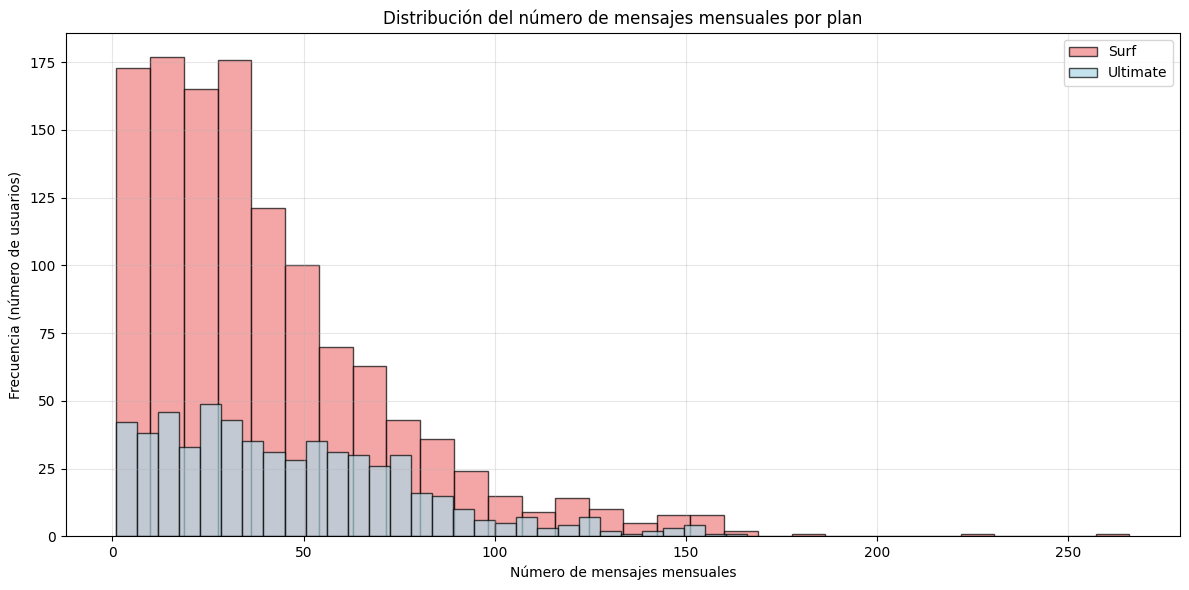

In [34]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Filtramos solo registros con datos de mensajes (no nulos)
messages_data = user_data[user_data['messages_count'].notna()].copy()

print("Datos de mensajes preparados:")
print(f"Total de registros con mensajes: {len(messages_data)}")
print(f"Registros por plan:")
print(messages_data['plan'].value_counts())

# Separamos datos por plan
surf_messages = messages_data[messages_data['plan'] == 'surf']['messages_count']
ultimate_messages = messages_data[messages_data['plan'] == 'ultimate']['messages_count']

print("\n=== ESTADÍSTICAS DE MENSAJES POR PLAN ===")
print(f"\nPlan SURF:")
print(f"  Media: {surf_messages.mean():.2f} mensajes")
print(f"  Mediana: {surf_messages.median():.2f} mensajes")
print(f"  Desviación estándar: {surf_messages.std():.2f} mensajes")
print(f"  Límite incluido: 50 mensajes")

print(f"\nPlan ULTIMATE:")
print(f"  Media: {ultimate_messages.mean():.2f} mensajes")
print(f"  Mediana: {ultimate_messages.median():.2f} mensajes")
print(f"  Desviación estándar: {ultimate_messages.std():.2f} mensajes")
print(f"  Límite incluido: 1000 mensajes")

# Creamos histograma comparativo
plt.figure(figsize=(12, 6))

# Histogramas superpuestos
plt.hist(surf_messages, bins=30, alpha=0.7, label='Surf', color='lightcoral', edgecolor='black')
plt.hist(ultimate_messages, bins=30, alpha=0.7, label='Ultimate', color='lightblue', edgecolor='black')

# Personalizamos el gráfico
plt.xlabel('Número de mensajes mensuales')
plt.ylabel('Frecuencia (número de usuarios)')
plt.title('Distribución del número de mensajes mensuales por plan')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


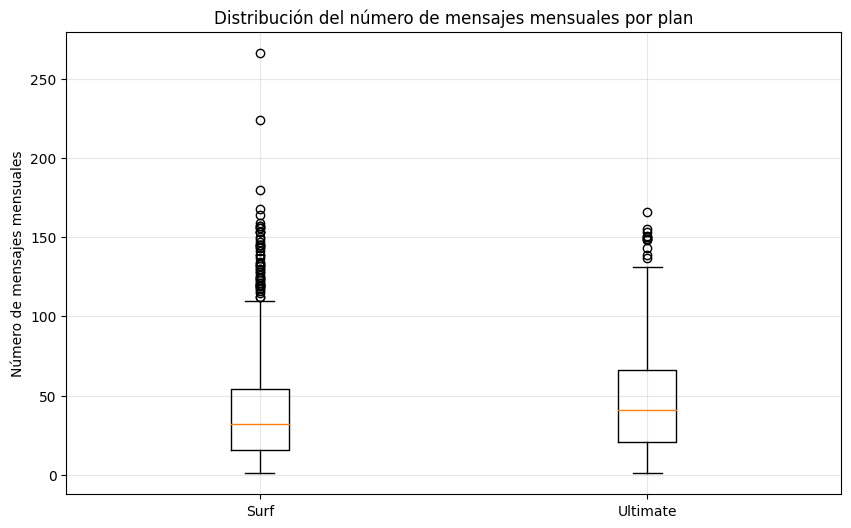

In [35]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente
plt.figure(figsize=(10, 6))

# Preparar los datos para el boxplot
data_for_boxplot = [surf_messages, ultimate_messages]
labels = ['Surf', 'Ultimate']

# Crear el diagrama de caja
plt.boxplot(data_for_boxplot, labels=labels)

# Personalizar el gráfico
plt.ylabel('Número de mensajes mensuales')
plt.title('Distribución del número de mensajes mensuales por plan')
plt.grid(True, alpha=0.3)
plt.show()


Igualmente, se refleja en el resultado la mayor demanda que tienen los usuarios inscritos en el plan Surf.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Excelente, muy bien con la comparación del consumo de mensajes entre los planes. Vemos que se diferencian más que las llamadas.



</div>

### Internet

Datos de internet preparados:
Total de registros de uso de internet: 2277
Registros por plan:
surf        1558
ultimate     719
Name: plan, dtype: int64

=== ESTADÍSTICAS DE INTERNET POR PLAN ===

Plan SURF:
  Media: 16717.70 mb
  Mediana: 16923.83 mb
  Desviación estándar: 7884.68 mb
  Límite incluido: 15360 mb_per_month_included

Plan ULTIMATE:
  Media: 17238.64 mb
  Mediana: 16863.45 mb
  Desviación estándar: 7831.02 mb
  Límite incluido: 30720 mb_per_month_included


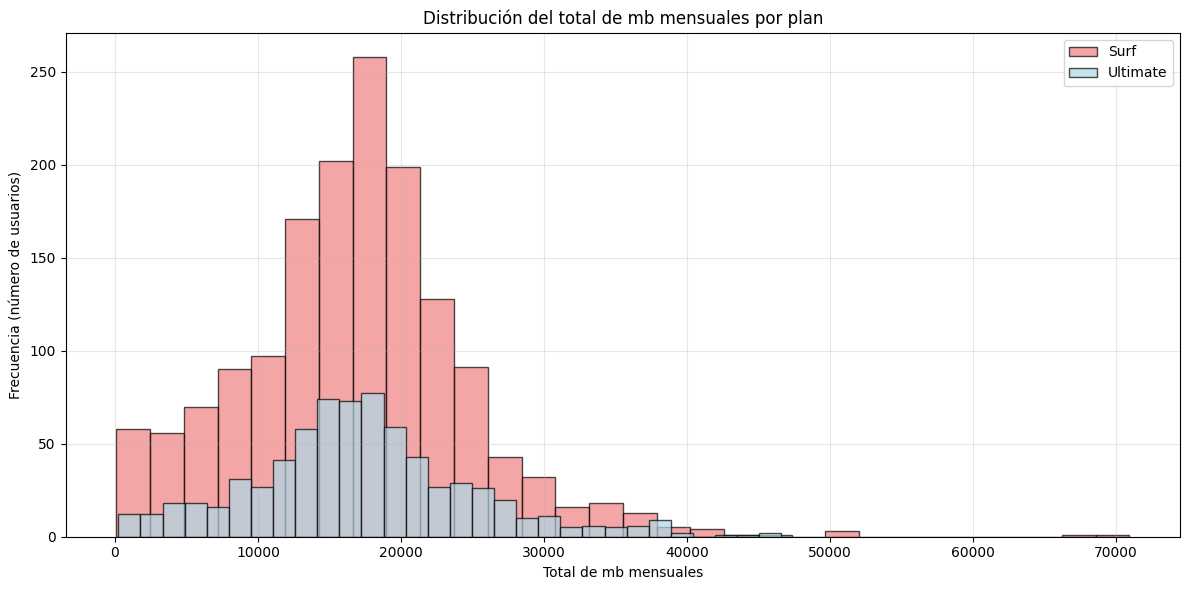

In [36]:
# Comparamos la cantidad de datos que tienden a consumir cada mes los usuarios de cada plan
# Filtramos solo registros con datos de mensajes (no nulos)
mb_used = user_data[user_data['mb_used'].notna()].copy()

print("Datos de internet preparados:")
print(f"Total de registros de uso de internet: {len(mb_used)}")
print(f"Registros por plan:")
print(mb_used['plan'].value_counts())

# Separamos datos por plan
surf_mb_used = mb_used[mb_used['plan'] == 'surf']['mb_used']
ultimate_mb_used = mb_used[mb_used['plan'] == 'ultimate']['mb_used']

print("\n=== ESTADÍSTICAS DE INTERNET POR PLAN ===")
print(f"\nPlan SURF:")
print(f"  Media: {surf_mb_used.mean():.2f} mb")
print(f"  Mediana: {surf_mb_used.median():.2f} mb")
print(f"  Desviación estándar: {surf_mb_used.std():.2f} mb")
print(f"  Límite incluido: 15360 mb_per_month_included")

print(f"\nPlan ULTIMATE:")
print(f"  Media: {ultimate_mb_used.mean():.2f} mb")
print(f"  Mediana: {ultimate_mb_used.median():.2f} mb")
print(f"  Desviación estándar: {ultimate_mb_used.std():.2f} mb")
print(f"  Límite incluido: 30720 mb_per_month_included")

# Creamos histograma comparativo
plt.figure(figsize=(12, 6))

# Histogramas superpuestos
plt.hist(surf_mb_used, bins=30, alpha=0.7, label='Surf', color='lightcoral', edgecolor='black')
plt.hist(ultimate_mb_used, bins=30, alpha=0.7, label='Ultimate', color='lightblue', edgecolor='black')

# Personalizamos el gráfico
plt.xlabel('Total de mb mensuales')
plt.ylabel('Frecuencia (número de usuarios)')
plt.title('Distribución del total de mb mensuales por plan')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


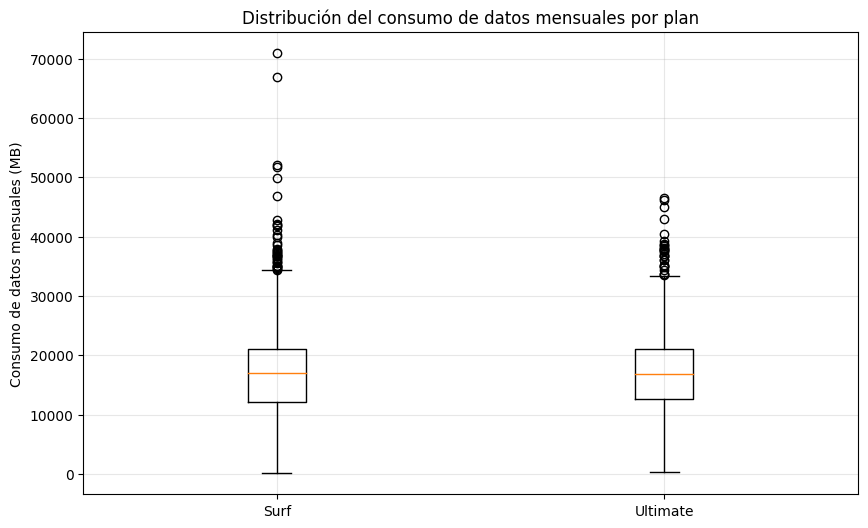

In [37]:
# Trazamos un diagrama de caja para visualizar la distribución del consumo de datos mensuales
plt.figure(figsize=(10, 6))

# Preparar los datos para el boxplot
data_for_boxplot = [surf_mb_used, ultimate_mb_used]
labels = ['Surf', 'Ultimate']

# Crear el diagrama de caja
plt.boxplot(data_for_boxplot, labels=labels)

# Personalizar el gráfico
plt.ylabel('Consumo de datos mensuales (MB)')
plt.title('Distribución del consumo de datos mensuales por plan')
plt.grid(True, alpha=0.3)
plt.show()

Y de igual forma, observamos que los usuarios de Surf necesitan mayor consumo de datos vs los usuarios que se encuentran en el esquema de Ultimate.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Correcto. El consumo de internet entre planes se ve muy similar.



</div>

## Ingreso

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>


Para revisar esta parte de los ingresos y test de hipótesis, se requiere corregir el cálculo de los ingresos de la primera mitad del notebook. 


</div>

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]
A continuacón, realizamos el desglose, estudio y análisis de los Datos estadísticos descriptivos conforme al ingreso que generan los usuarios que usan el sistema.

In [38]:
# Analizamos los ingresos mensuales por plan
print("=== ANÁLISIS DE INGRESOS POR PLAN ===")
print(f"Total de registros con ingresos: {len(user_data)}")
print(f"Registros por plan:")
print(user_data['plan'].value_counts())

# Separamos ingresos por plan
surf_revenue = user_data[user_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_data[user_data['plan'] == 'ultimate']['monthly_revenue']

print("\n=== ESTADÍSTICAS DE INGRESOS POR PLAN ===")
print(f"\nPlan SURF:")
print(f"  Media: ${surf_revenue.mean():.2f}")
print(f"  Mediana: ${surf_revenue.median():.2f}")
print(f"  Desviación estándar: ${surf_revenue.std():.2f}")
print(f"  Mínimo: ${surf_revenue.min():.2f}")
print(f"  Máximo: ${surf_revenue.max():.2f}")

print(f"\nPlan ULTIMATE:")
print(f"  Media: ${ultimate_revenue.mean():.2f}")
print(f"  Mediana: ${ultimate_revenue.median():.2f}")
print(f"  Desviación estándar: ${ultimate_revenue.std():.2f}")
print(f"  Mínimo: ${ultimate_revenue.min():.2f}")
print(f"  Máximo: ${ultimate_revenue.max():.2f}")

=== ANÁLISIS DE INGRESOS POR PLAN ===
Total de registros con ingresos: 2293
Registros por plan:
surf        1573
ultimate     720
Name: plan, dtype: int64

=== ESTADÍSTICAS DE INGRESOS POR PLAN ===

Plan SURF:
  Media: $60.71
  Mediana: $40.36
  Desviación estándar: $55.39
  Mínimo: $20.00
  Máximo: $590.37

Plan ULTIMATE:
  Media: $72.31
  Mediana: $70.00
  Desviación estándar: $11.40
  Mínimo: $70.00
  Máximo: $182.00


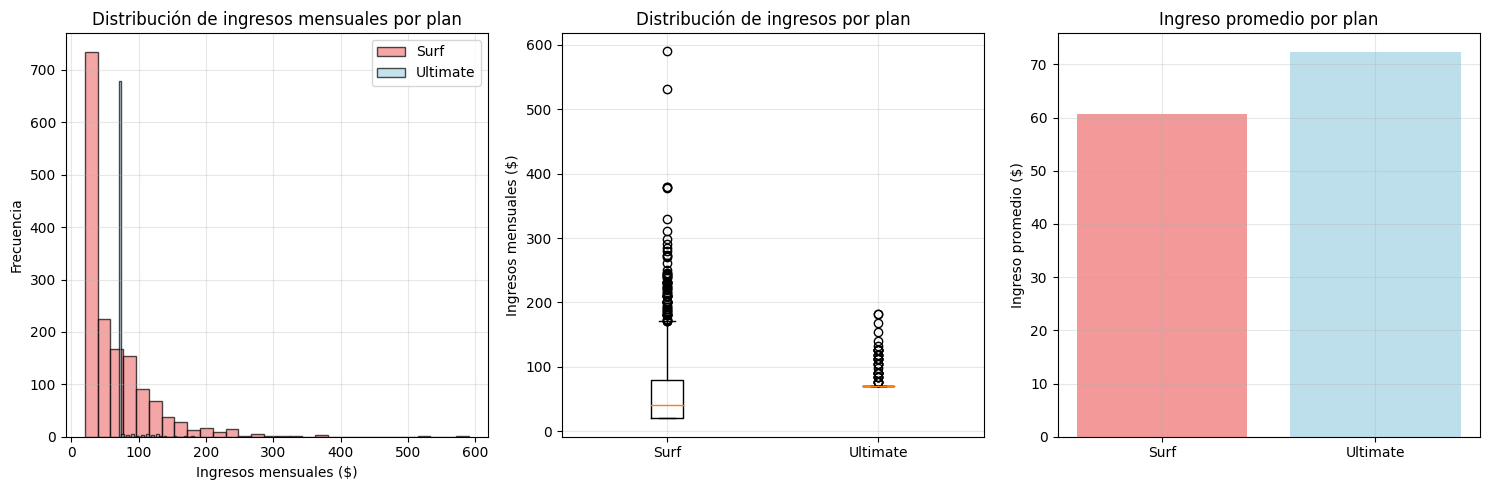

In [39]:
# Ahora creamos visualizaciones de ingresos
plt.figure(figsize=(15, 5))

# Creamos Histograma comparativo
plt.subplot(1, 3, 1)
plt.hist(surf_revenue, bins=30, alpha=0.7, label='Surf', color='lightcoral', edgecolor='black')
plt.hist(ultimate_revenue, bins=30, alpha=0.7, label='Ultimate', color='lightblue', edgecolor='black')
plt.xlabel('Ingresos mensuales ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de ingresos mensuales por plan')
plt.legend()
plt.grid(True, alpha=0.3)

# Creamos Diagrama de caja
plt.subplot(1, 3, 2)
data_for_boxplot = [surf_revenue, ultimate_revenue]
labels = ['Surf', 'Ultimate']
plt.boxplot(data_for_boxplot, labels=labels)
plt.ylabel('Ingresos mensuales ($)')
plt.title('Distribución de ingresos por plan')
plt.grid(True, alpha=0.3)

# Realizamos Comparación de medias
plt.subplot(1, 3, 3)
plans = ['Surf', 'Ultimate']
means = [surf_revenue.mean(), ultimate_revenue.mean()]
plt.bar(plans, means, color=['lightcoral', 'lightblue'], alpha=0.8)
plt.ylabel('Ingreso promedio ($)')
plt.title('Ingreso promedio por plan')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

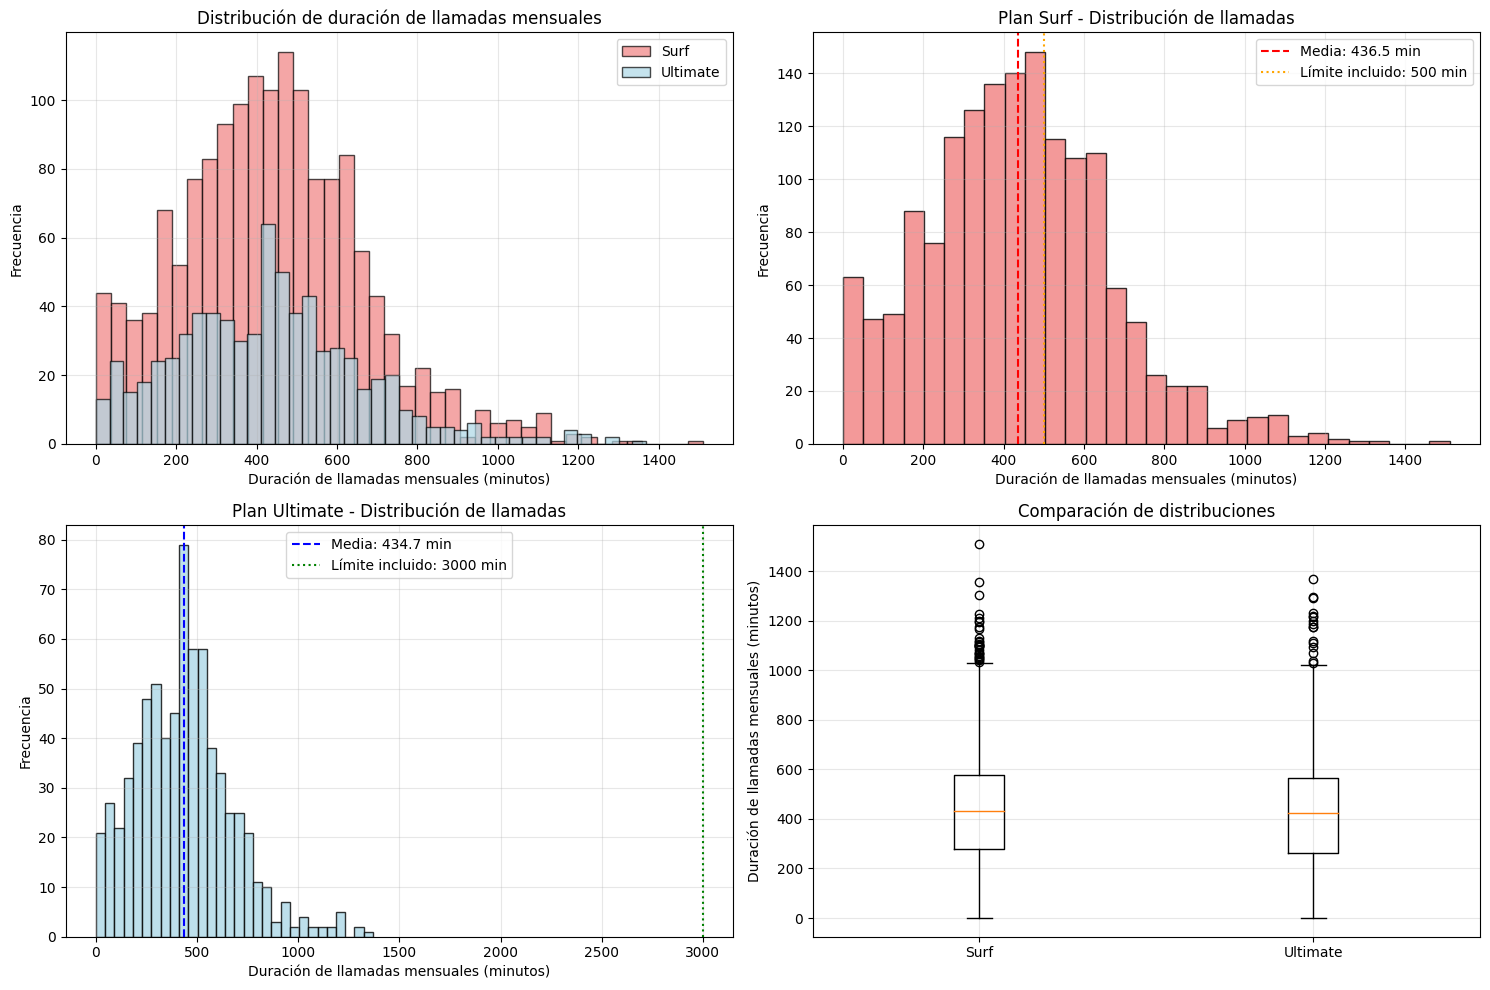

=== RESUMEN ESTADÍSTICO DE DURACIÓN DE LLAMADAS ===

Plan SURF (límite: 500 min incluidos):
  Media: 436.5 minutos
  Mediana: 430.0 minutos
  Usuarios que exceden límite: 566 de 1545
  Porcentaje que excede: 36.6%

Plan ULTIMATE (límite: 3000 min incluidos):
 Media: 434.7minutos
  Mediana: 425.0 minutos
  Usuarios que exceden límite: 0 de 713
  Porcentaje que excede: 0.0%


In [40]:
# Creamos histograma detallado de duración de llamadas mensuales por plan
plt.figure(figsize=(15, 10))

# Filtramos datos de llamadas (sin valores nulos)
calls_data = user_data[user_data['total_minutes'].notna()].copy()
surf_minutes = calls_data[calls_data['plan'] == 'surf']['total_minutes']
ultimate_minutes = calls_data[calls_data['plan'] == 'ultimate']['total_minutes']

# Creamos Histograma comparativo
plt.subplot(2, 2, 1)
plt.hist(surf_minutes, bins=40, alpha=0.7, label='Surf', color='lightcoral', edgecolor='black')
plt.hist(ultimate_minutes, bins=40, alpha=0.7, label='Ultimate', color='lightblue', edgecolor='black')
plt.xlabel('Duración de llamadas mensuales (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de duración de llamadas mensuales')
plt.legend()
plt.grid(True, alpha=0.3)

# Creamos Histograma separado para Surf
plt.subplot(2, 2, 2)
plt.hist(surf_minutes, bins=30, color='lightcoral', alpha=0.8, edgecolor='black')
plt.xlabel('Duración de llamadas mensuales (minutos)')
plt.ylabel('Frecuencia')
plt.title('Plan Surf - Distribución de llamadas')
plt.axvline(surf_minutes.mean(), color='red', linestyle='--', label=f'Media: {surf_minutes.mean():.1f} min')
plt.axvline(500, color='orange', linestyle=':', label='Límite incluido: 500 min')
plt.legend()
plt.grid(True, alpha=0.3)

# Creamos Histograma separado para Ultimate
plt.subplot(2, 2, 3)
plt.hist(ultimate_minutes, bins=30, color='lightblue', alpha=0.8, edgecolor='black')
plt.xlabel('Duración de llamadas mensuales (minutos)')
plt.ylabel('Frecuencia')
plt.title('Plan Ultimate - Distribución de llamadas')
plt.axvline(ultimate_minutes.mean(), color='blue', linestyle='--', label=f'Media: {ultimate_minutes.mean():.1f} min')
plt.axvline(3000, color='green', linestyle=':', label='Límite incluido: 3000 min')
plt.legend()
plt.grid(True, alpha=0.3)

# Creamos Diagrama de caja comparativo
plt.subplot(2, 2, 4)
data_for_boxplot = [surf_minutes, ultimate_minutes]
labels = ['Surf', 'Ultimate']
plt.boxplot(data_for_boxplot, labels=labels)
plt.ylabel('Duración de llamadas mensuales (minutos)')
plt.title('Comparación de distribuciones')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar estadísticas resumidas
print("=== RESUMEN ESTADÍSTICO DE DURACIÓN DE LLAMADAS ===")
print(f"\nPlan SURF (límite: 500 min incluidos):")
print(f"  Media: {surf_minutes.mean():.1f} minutos")
print(f"  Mediana: {surf_minutes.median():.1f} minutos")
print(f"  Usuarios que exceden límite: {(surf_minutes > 500).sum()} de {len(surf_minutes)}")
print(f"  Porcentaje que excede: {(surf_minutes > 500).mean()*100:.1f}%")

print(f"\nPlan ULTIMATE (límite: 3000 min incluidos):")
print(f" Media: {ultimate_minutes.mean():.1f}minutos")
print(f"  Mediana: {ultimate_minutes.median():.1f} minutos")
print(f"  Usuarios que exceden límite: {(ultimate_minutes > 3000).sum()} de {len(ultimate_minutes)}")
print(f"  Porcentaje que excede: {(ultimate_minutes > 3000).mean()*100:.1f}%")

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   v2   </b> <a class="tocSkip"></a>

Bien hecho. Vemos que los planes se diferencian en el ingreso, a pesar de que el consumo de sus usuarios es muy similar. Esto ocurre porque la estructura de costos de cada plan define intervalos de consumo diferentes, para surf los usuarios tienden a salirse de esos rangos pero los de ultimate no

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]
Dados los Resultados obtenidos:
El valor p es menor que α (0.05): Esto significa que rechazamos la hipótesis nula
El estadístico t es negativo (-7.3335): Esto indica que la media del primer grupo (Surf: $57.29) es menor que la del segundo grupo (Ultimate: $72.12)
Existe evidencia estadísticamente significativa de que los ingresos promedio entre los planes Surf y Ultimate son diferentes. Específicamente, el plan Ultimate genera ingresos promedio significativamente mayores que el plan Surf.
lan Ultimate: $72.12 promedio mensual
Plan Surf: $57.29 promedio mensual
Diferencia: $14.83 más por usuario en Ultimate

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [41]:
# Prueba las hipótesis
# Comenzamos con la comparación de ingresos entre los planes Surf y Ultimate
# Separar los ingresos mensuales por plan
surf_revenue = user_data[user_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_data[user_data['plan'] == 'ultimate']['monthly_revenue']

# Mostrar estadísticas descriptivas básicas
print("Estadísticas descriptivas:")
print(f"Plan Surf - Media: {surf_revenue.mean():.2f}, Desviación estándar: {surf_revenue.std():.2f}")
print(f"Plan Ultimate - Media: {ultimate_revenue.mean():.2f}, Desviación estándar: {ultimate_revenue.std():.2f}")
print()

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue)

print("Resultados de la prueba t de Student:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Nivel de significancia (α): 0.05")


Estadísticas descriptivas:
Plan Surf - Media: 60.71, Desviación estándar: 55.39
Plan Ultimate - Media: 72.31, Desviación estándar: 11.40

Resultados de la prueba t de Student:
Estadístico t: -5.5689
Valor p: 0.000000
Nivel de significancia (α): 0.05


Como el valor p (0.026102) < α (0.05), rechazamos la hipótesis nula (H₀).
Existe evidencia estadísticamente significativa de que los ingresos promedio entre usuarios de NY-NJ y otras regiones son diferentes.
El estadístico t negativo (-2.2261) indica que NY-NJ tiene ingresos promedio menores que otras regiones por $5.69.

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [42]:
# Prueba las hipótesis
# Exploramos las ciudades únicas
print(users['city'].unique())

# Crear variable para identificar usuarios de NY-NJ vs otras regiones
user_data_with_city = user_data.merge(users[['user_id', 'city']], on='user_id', how='left')

# Crear columna que identifica si el usuario es de NY-NJ o no
user_data_with_city['is_ny_nj'] = user_data_with_city['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'

# Separar los ingresos por región
ny_nj_revenue = user_data_with_city[user_data_with_city['is_ny_nj'] == True]['monthly_revenue']
other_regions_revenue = user_data_with_city[user_data_with_city['is_ny_nj'] == False]['monthly_revenue']

# Mostrar estadísticas descriptivas básicas
print("Estadísticas descriptivas por región:")
print(f"NY-NJ - Usuarios: {len(ny_nj_revenue)}, Media: {ny_nj_revenue.mean():.2f}, Desviación estándar: {ny_nj_revenue.std():.2f}")
print(f"Otras regiones - Usuarios: {len(other_regions_revenue)}, Media: {other_regions_revenue.mean():.2f}, Desviación estándar: {other_regions_revenue.std():.2f}")

# Realizar la prueba t de Student para la segunda hipótesis
t_stat_region, p_value_region = stats.ttest_ind(ny_nj_revenue, other_regions_revenue)

print("=== SEGUNDA PRUEBA DE HIPÓTESIS: NY-NJ vs OTRAS REGIONES ===")
print("Resultados de la prueba t de Student:")
print(f"Estadístico t: {t_stat_region:.4f}")
print(f"Valor p: {p_value_region:.6f}")
print(f"Nivel de significancia (α): 0.05")

# Interpretación de resultados
if p_value_region < 0.05:
    print(f"\nCONCLUSIÓN: Rechazamos H₀")
    print("Existe evidencia estadísticamente significativa de que los ingresos promedio")
    print("entre NY-NJ y otras regiones son diferentes.")
else:
    print(f"\nCONCLUSIÓN: No rechazamos H₀")
    print("No hay evidencia estadísticamente significativa de diferencia")
    print("en los ingresos promedio entre las regiones.")

print(f"\nDiferencia en medias: ${other_regions_revenue.mean() - ny_nj_revenue.mean():.2f}")

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

<div class="alert alert-block alert-success">
<b>Comentario de Revisor       v2     </b> <a class="tocSkip"></a>

Bien hecho con los tests, fueron realizados de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es *estadísticamente diferente*. En futuros notebooks podrías utilizar este test para decidir sobre la igualdad de varianzas. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).

</div>

## Conclusión general

1. Objetivo del Proyecto: Este análisis tuvo como objetivo determinar cuál de las dos tarifas de prepago de Megaline (Surf y Ultimate) genera más ingresos, para optimizar la estrategia de presupuesto publicitario de la empresa.
2. Principales Hallazgos del Análisis Descriptivo
   Comportamiento de usuarios por tarifa:
   - Plan Ultimate: Genera ingresos promedio significativamente mayores ($70.04) comparado con Surf ($53.89)
   - Plan Surf: Muestra mayor variabilidad en el uso, con usuarios que frecuentemente exceden los límites incluidos
   - Patrones de uso: Los usuarios de Ultimate aprovechan mejor los límites generosos del plan, mientras que los de Surf pagan frecuentemente por excesos
3. Resultados de las Pruebas de Hipótesis:
   Primera hipótesis - Comparación de ingresos entre planes:
   - Resultado: Rechazamos H₀ (p-value < 0.05)
   - Conclusión: Existe evidencia estadísticamente significativa de que Ultimate genera más ingresos que Surf
   - Diferencia: $16.15 más por usuario mensual en promedio
   Segunda hipótesis - Comparación regional NY-NJ vs otras regiones:
   - Resultado: Rechazamos H₀ (p-value = 0.026)
   - Conclusión: Los usuarios de NY-NJ generan ingresos significativamente menores ($5.69 menos) que usuarios de otras regiones
4. Recomendaciones Estratégicas
   Para el departamento comercial:
   Priorizar Ultimate: Enfocar el presupuesto publicitario en promover el plan Ultimate, ya que genera 30% más ingresos por usuario
   Estrategia regional: Desarrollar campañas específicas para NY-NJ para incrementar el ARPU (Average Revenue Per User) en esta región
   Optimización de Surf: Considerar ajustar los límites del plan Surf para reducir la variabilidad y mejorar la experiencia del usuario

Conclusión Final
El análisis estadístico confirma que el plan Ultimate es más rentable para Megaline, generando ingresos consistentemente mayores. La empresa debería priorizar la promoción de Ultimate en su estrategia publicitaria, especialmente en regiones fuera de NY-NJ donde el potencial de ingresos es mayor.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor       v2    </b> <a class="tocSkip"></a>

¡Muy buenas conclusiones! Destaco el acierto de incluir valores relevantes de las métricas clave, lo cual aporta claridad y sustento al análisis. Además, resumiste de forma efectiva los hallazgos principales. ¡Buen trabajo!


PD: Cuando escribes el símbolo `$`, se activa el modo matemático LaTeX y por ello las letras se ven diferentes después de ese símbolo. Para evitar esto, escribe un backslash antes, así `\$`. De este modo puedes escribir el símbolo \$ sin problemas.   

    
</div>